In [ ]:
%load_ext autoreload
%autoreload 2
import torch
from mydataloader import MyDataLoader
from myconfig import MyConfig
from mymodel import SimpleMLP, WhatNet
import matplotlib.pyplot as plt

config = MyConfig()
data_path = config.data_path
results_path = config.results_path
label_pos = config.label_pos
device = config.device

# 加载预处理用的mu和sigma，模型参数
data = MyDataLoader.load(data_path)
mu = torch.load(results_path + "\\mu.txt", weights_only=True)
sigma = torch.load(results_path + "\\sigma.txt", weights_only=True)
param = torch.load(results_path + "\\net.params", weights_only=True)
net = WhatNet()
net.load_state_dict(param)

<All keys matched successfully>

In [2]:
data[:, label_pos+1:] = (data[:, label_pos+1:] - mu) / sigma
X = data[:, label_pos+1:].to(device)
y = data[:, label_pos].reshape(-1, 1).to(device)

net.eval()
net.to(device)
loss_fn = torch.nn.MSELoss()
with torch.no_grad():
    y_hat = net(X)
    loss = loss_fn(y_hat, y).item()

var = y.reshape(-1).var().item()
r2 = 1 - (loss / var)
print(f"mse: {loss:.5f}, r2: {r2:.5f}")

mse: 0.05009, r2: 0.69741


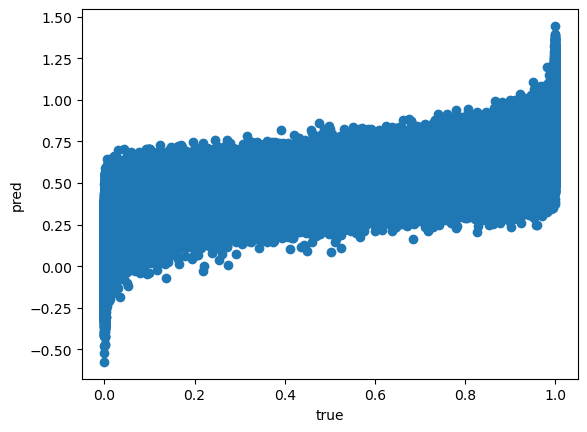

In [3]:
plt.figure()
plt.scatter(y.to("cpu"), y_hat.to("cpu"), label="train")
plt.xlabel("true")
plt.ylabel("pred")
plt.show()